# Final Project: Trends in Immigration amid Demographic Decline in Japan (Report and Code)

**Author:** Kevin Jin

**Course:** CB&B 634 Computational Methods for Informatics

**Instructor:** Robert McDougal

**Term:** Fall 2023

# Introduction
In July 2023, the Japanese government released data indicating that in 2022, the number of people in all 47 prefectures of the country fell for the first time since the government began tracking the data in 1968.[^1] Last year marked the 14th consecutive year that Japan's population has been falling and for the first time included Okinawa prefecture, which has historically had a high birthrate.[^2]

Being a relatively new and unprecedented phenomenon, the consequences of population decline are chiefly theoretical; however, their beginnings are already being felt by Japanese society. The main detriment of a middle- or top-heavy population pyramid is a rise in the dependency ratio, or heavier reliance by the older generations on the younger generations and greater economic pressure on the workforce as a result.[^3] Greater risk of recession and decreased prosperity follow, accompanied by less innovation, worsened culture, declining military strength, strained mental health resources, and so on.[^4] As such, with a population already skewing older, Japan faces grim economic prospects. The Japanese government has invested a tremendous amount of resources into addressing the issue, yet heated debate continues over the causes of Japan's population decline and the potential solution of immigration and its implications.[^5]

This report will present Japan's ongoing demographic crash in graphic detail and attempt to identify causes. It will also spotlight immigration and provide spatial insights into the state of immigration in Japan.

[^1]: https://english.kyodonews.net/news/2023/07/c6b8e75dc7a9-japanese-population-falls-in-all-47-prefectures-for-1st-time.html
[^2]: https://www.bloomberg.com/news/articles/2023-07-26/japanese-population-falls-in-all-47-prefectures-for-first-time
[^3]: https://www.youtube.com/watch?v=LBudghsdByQ
[^4]: https://en.wikipedia.org/w/index.php?title=Population_decline#Possible_consequences
[^5]: https://www.economist.com/asia/2023/12/16/how-to-entice-japanese-couples-to-have-babies

# Part 1: Demographic crash 

## 1a: How does Japan's fertility rate compare to peer nations?

The first question to ask is whether Japan's situation is unique. 

### Background: Fertility rates
To sustain a population, each woman within it needs to have somewhere around two children during her lifetime; interpreted in a vacuum, this value is known as the **total fertility rate** for that population and assumes that the woman's individual fertility rate remains constant throughout her lifetime and that she lives from birth until the end of her reproductive life. Total fertility rates can vary significantly from country to country depending on mortality rates.[^1] Averaged globally, the total fertility rate needed to sustain the world population (known as **replacement-level fertility**) is around 2.1.[^2] If the total fertility rate falls below replacement-level, each new generation will be less populous than the older, previous one, a phenomenon known as **sub-replacement fertility**.[^3] Japan's total fertility rate was around 1.26 in 2022, a record low that is well below replacement-level and especially striking considering that it has now declined for seven consecutive years, firmly placing it among countries with the lowest fertility rates.[^4]

[^1]: https://en.wikipedia.org/w/index.php?title=Total_fertility_rate
[^2]: https://doi.org/10.1023/B:POPU.0000020882.29684.8e
[^3]: https://en.wikipedia.org/w/index.php?title=Sub-replacement_fertility
[^4]: https://www.reuters.com/world/asia-pacific/japan-demographic-woes-deepen-birth-rate-hits-record-low-2023-06-02/

### Dataset 1: Total fertility rates by country from 1960 - 2022
Data is sourced from [The World Bank](https://data.worldbank.org/indicator/SP.DYN.TFRT.IN) and includes data up through 2022 for countries of interest. The World Bank provides its data under the [Creative Commons Attribution 4.0 International license](https://creativecommons.org/licenses/by/4.0).

#### Data cleaning
Manually removed CSV headers (rows 1-4) and imputed total fertility rate data from 2022 for countries of interest. 2022 data was sourced from below:
* Japan: [Reuters](https://www.reuters.com/world/asia-pacific/japan-demographic-woes-deepen-birth-rate-hits-record-low-2023-06-02/)
* South Korea: [CNN](https://www.cnn.com/2023/12/15/asia/south-korea-to-see-population-plummet-intl-hnk/index.html)
* China: [The Guardian](https://www.theguardian.com/world/2023/aug/16/china-fertility-rate-dropped-to-record-low-in-2022-estimates-show)
* United States: [Centers for Disease Control and Prevention](https://www.cdc.gov/nchs/data/vsrr/vsrr028.pdf)
* Europe: [OECD](https://data.oecd.org/pop/fertility-rates.htm)

In [1]:
# Load data for total fertility rates by year and country
import pandas as pd

fertility_rates = pd.read_csv("datasets/1_demographics/total_fertility_rates_by_year.csv")
fertility_rates.drop(columns=["Country Code", "Indicator Name", "Indicator Code"], inplace=True) # Drop unnecessary columns
fertility_rates = fertility_rates.transpose() # Transpose the dataframe for easier manipulation
fertility_rates.rename(columns=fertility_rates.iloc[0], inplace=True) # Rename columns to country names
fertility_rates.drop(fertility_rates.index[0], inplace = True) # Drop the first row
fertility_rates.insert(0, 'Year', fertility_rates.index) # Add a column for the year
fertility_rates = fertility_rates.reset_index() # Reset the index
fertility_rates.head()
fertility_rates.drop(columns=["index"], inplace=True) # Drop the old index
fertility_rates.drop(fertility_rates.tail(1).index, inplace=True) # Drop the last row of 2022, which is a row of NaNs

In [2]:
# Plot fertility rate for Japan only over 1960-2021
import plotly.express as px

fig = px.line(fertility_rates, x="Year", y="Japan", title="Total Fertility Rate in Japan")
fig.update_traces(line_color='crimson') # Change color of line
fig.update_xaxes(tickmode='linear', tick0=1960, dtick=5, tickangle=45) # Only show x-axis labels every 5 years and rotate them 45 degrees
fig.update_yaxes(range=[0, 8]) # Set y-axis range to 0-8
fig.update_layout(title_text='Total Fertility Rate of Japan (1960 - 2021)', xaxis_title='Year', yaxis_title='Total Fertility Rate') # Plot and axis titles
fig.add_hline(y=2.1, line_dash="dash", line_color="black", annotation_text="Global Replacement Fertility Rate", annotation_position="top right") # Indicate global average fertility rate of 2.1 with horizontal line
fig.show()

In [3]:
# Plot fertility rates for Japan and peer nations over 1960-2021
fig = px.line(fertility_rates, x="Year", y=["Japan", "China", "Korea, Rep.", "India", "United States", "Germany", "France", "United Kingdom", "Italy", "Canada", "Australia", "Spain", "Russian Federation"], title="Total Fertility Rates of Japan and Selected Nations")
fig.update_xaxes(tickmode='linear', tick0=1960, dtick=5, tickangle=45) # Only show x-axis labels every 5 years and rotate them 45 degrees
fig.update_traces(line=dict(color='crimson'), selector=dict(name='Japan')) # Change the color of the Japan line
fig.update_yaxes(range=[0, 8]) # Set y-axis range to 0-8
fig.update_layout(title_text='Total Fertility Rates of Japan and Selected Nations (1960 - 2021)', xaxis_title='Year', yaxis_title='Total Fertility Rate') # Plot and axis titles
fig.update_layout(legend_title_text='Country') # Move the legend to the top right corner
fig.add_hline(y=2.1, line_dash="dash", line_color="black", annotation_text="Global Replacement Fertility Rate", annotation_position="top right") # Indicate global average fertility rate of 2.1 with horizontal line
fig.show()

**Commentary:** It is evident that Japan is not entirely unique in terms of having a declining fertility rate; in fact, it is in line with most other developed nations with regards to falling below replacement rates and continues to trend downwards.

## 1b: What is causing falling fertility rates?

An often cited factor influencing decisions not to have children is increasing cost of living, which makes raising children especially difficult in countries that place high emphasis on long-term, costly investments such as education. Below, I will attempt to demonstrate an association between higher wages in developing countries and low fertility rates, and also show that this is not unique to Japan.

### Dataset 2: Average wage by country from 1991 - 2022

Data is sourced from [OECD](https://data.oecd.org/earnwage/average-wages.htm) and provided under a Creative Commons license.

In [4]:
# Load wage data for Japan
import pandas as pd

wages = pd.read_csv("datasets/1_demographics/average_wages.csv")
wages_japan = wages[wages['LOCATION'] == "JPN"] # Take only Japan rows
wages_japan = wages_japan[['TIME', 'Value']] # Grab year and value columns
wages_japan.rename(columns={"TIME": "Year", "Value": "Average Wage (USD)"}, inplace=True) # Rename columns
wages_japan.reset_index(drop=True, inplace=True) # Reset the index

# Grab fertility rates for Japan from 1991 - 2022
fertility_rates_japan = fertility_rates[["Year", "Japan"]].apply(pd.to_numeric) # Convert columns to numeric
fertility_rates_japan.rename(columns={"Japan": "Total Fertility Rate"}, inplace=True) # Rename column
fertility_rates_japan = fertility_rates_japan[fertility_rates_japan['Year'] >= 1991] # Take only rows from 1991 onwards

# Combine the two dataframes
wages_japan = wages_japan.join(fertility_rates_japan.set_index('Year'), on='Year') # Join the two dataframes on the year column
wages_japan.head()

,Year,Average Wage (USD),Total Fertility Rate
0,1991,40378.559106,1.53
1,1992,40433.759448,1.50
2,1993,40123.212265,1.46
3,1994,40523.159403,1.50
4,1995,41013.000000,1.42


In [5]:
# Plot average wages against fertility rates for Japan over 1991 - 2022
import plotly.express as px

fig = px.scatter(wages_japan, x="Average Wage (USD)", y="Total Fertility Rate", trendline="ols", trendline_color_override="red") # Plot scatter plot with linear trendline
fig.update_layout(title_text='Average Wage vs. Total Fertility Rate in Japan (1991 - 2022)', xaxis_title='Average Wage (USD)', yaxis_title='Total Fertility Rate') # Plot and axis titles
fig.show()

In [6]:
# Repeat for peer nations (United States, Canada, South Korea, United Kingdom, Germany, France) using multiple subplots
from plotly.subplots import make_subplots

# Grab fertility rates for peer nations from 1991 - 2022
fertility_rates_peers = fertility_rates[["Year", "United States", "Canada", "Korea, Rep.", "United Kingdom", "Germany", "France"]].apply(pd.to_numeric) # Convert columns to numeric
fertility_rates_peers.rename(columns={"United States": "United States", "Canada": "Canada", "Korea, Rep.": "South Korea", "United Kingdom": "United Kingdom", "Germany": "Germany", "France": "France"}, inplace=True) # Rename columns
fertility_rates_peers = fertility_rates_peers[fertility_rates_peers['Year'] >= 1991] # Take only rows from 1991 onwards

# Combine fertility rates with average wages for peer nations
wages_peers = wages[wages['LOCATION'].isin(["USA", "CAN", "KOR", "GBR", "DEU", "FRA"])] # Take only peer nations
wages_peers = wages_peers[['LOCATION', 'TIME', 'Value']] # Grab country, year, and value columns
wages_peers.rename(columns={"TIME": "Year", "Value": "Average Wage (USD)"}, inplace=True) # Rename columns
wages_peers.reset_index(drop=True, inplace=True) # Reset the index
wages_peers = wages_peers[wages_peers['Year'] >= 1991] # Take only rows from 1991 onwards
wages_peers = wages_peers.pivot(index='Year', columns='LOCATION', values='Average Wage (USD)') # Pivot the dataframe to make country codes into columns
wages_peers.reset_index(inplace=True) # Reset the index
wages_peers = wages_peers.apply(pd.to_numeric) # Convert columns to numeric
wages_peers = wages_peers.join(fertility_rates_peers.set_index('Year'), on='Year') # Join the two dataframes on the year column
wages_peers.head()

,Year,CAN,DEU,FRA,GBR,KOR,USA,United States,Canada,South Korea,United Kingdom,Germany,France
0,1991,42426.302847,45193.256513,39638.586673,36982.913626,25148.578724,52224.423793,2.0625,1.72,1.710,1.82,1.33,1.75
1,1992,43045.900767,47965.972783,40082.351125,37721.355452,26213.877988,53434.839038,2.0460,1.71,1.760,1.79,1.29,1.74
2,1993,42952.718894,48281.862151,40543.786159,38323.529642,27825.803698,53133.756790,2.0195,1.69,1.654,1.76,1.28,1.73
3,1994,42464.175838,48388.119117,40713.468818,38989.345020,28392.053903,52930.640177,2.0015,1.69,1.656,1.74,1.24,1.73
4,1995,42369.000000,49414.000000,41318.000000,38995.000000,31180.000000,53231.000000,1.9780,1.67,1.634,1.71,1.25,1.74


In [7]:
# Plot average wages against fertility rates for peer nations over 1991 - 2022
fig = make_subplots(rows=2, cols=3, subplot_titles=("United States", "Canada", "South Korea", "United Kingdom", "Germany", "France"), x_title="Average Wage (USD)", y_title="Total Fertility Rate", ) # Create subplots
fig.add_trace(px.scatter(wages_peers, x="USA", y="United States", trendline="ols", trendline_color_override="red").data[0], row=1, col=1) 
fig.add_trace(px.scatter(wages_peers, x="CAN", y="Canada", trendline="ols", trendline_color_override="red").data[0], row=1, col=2)
fig.add_trace(px.scatter(wages_peers, x="KOR", y="South Korea", trendline="ols", trendline_color_override="red").data[0], row=1, col=3)
fig.add_trace(px.scatter(wages_peers, x="GBR", y="United Kingdom", trendline="ols", trendline_color_override="red").data[0], row=2, col=1)
fig.add_trace(px.scatter(wages_peers, x="DEU", y="Germany", trendline="ols", trendline_color_override="red").data[0], row=2, col=2)
fig.add_trace(px.scatter(wages_peers, x="FRA", y="France", trendline="ols", trendline_color_override="red").data[0], row=2, col=3)
fig.update_layout(title_text='Average Wage vs. Total Fertility Rate in Peer Nations (1991 - 2022)') # Plot title
fig.show()

**Commentary:** Can't get the trendlines to display on the subplots for some reason. In any case, Japan is far from alone in displaying an inversely proportional association between average wage and fertility rate.

## 2a: What kinds of people are coming to Japan?

### Dataset 3: Visa application by nationality in Japan
[Visa Application by Nationality in Japan](https://www.kaggle.com/datasets/yutodennou/visa-issuance-by-nationality-and-region-in-japan/data) is a multivariate dataset compiled by Waticson on Kaggle. It primarily contains information on numbers of visas issued as well as purpose of visit per country from 2006 to 2017. This dataset is licensed using the [Database Contents License (DbCL) v1.0, from Open Data Commons.](https://opendatacommons.org/licenses/dbcl/1-0/), which explicitly permits reuse.

In [8]:
# Load visa data for Japan
import pandas as pd
visas = pd.read_csv("datasets/2_immigration/visa_number_in_japan.csv")
visas.head()

,Year,Regional code,Country,Number of issued,Number of issued_numerical,Travel certificate,Diplomacy,Public use,Passing,Short -term stay,...,identification,Specific_housework employee,Specified_short term,Specific_profit representative staff,Specific_working holiday,Specified_Amasport,"Specific_Japanese spouse, etc.","Specific_Permanent resident's spouse, etc.",Specified_Distingant,Specific_Others
0,2017,0,total,5869012,741415,389.0,4862.0,16402.0,8518,5392838,...,53552,122.0,NaN,49.0,15521.0,77.0,10227,2181.0,16945,8431.0
1,2017,40,Afghanistan,1005,46,0.0,14.0,112.0,0,224,...,13,0.0,NaN,0.0,0.0,0.0,2,3.0,8,0.0
2,2017,80,Albania,252,7,0.0,0.0,2.0,1,200,...,0,0.0,NaN,0.0,0.0,0.0,0,0.0,0,0.0
3,2017,120,Algeria,899,19,0.0,8.0,11.0,3,813,...,2,0.0,NaN,0.0,0.0,0.0,1,1.0,0,0.0
4,2017,200,Andra,5,0,0.0,0.0,0.0,0,0,...,0,0.0,NaN,0.0,0.0,0.0,0,0.0,0,0.0


In [9]:
# Plot total visas issued by Japan from 2006-2017
import plotly.express as px
total = visas[visas["Country"] == "total"] # Pull country totals
visas = visas[visas["Country"] != "total"].reset_index(drop=True) # Delete non-total rows

fig = px.bar(total, x="Year", y="Number of issued")
fig.update_layout(title="Total visas issued by Japan from 2006-2017")
fig.show()

In [10]:
# Plot visas issued for top ten countries of issuance except China from 2006-2017
top_countries = visas[visas['Country'] != 'total'].groupby('Country')['Number of issued'].sum().nlargest(10).index
top_countries_data = visas[(visas['Country'].isin(top_countries)) & (visas['Country'] != 'total')]
top_countries_data = top_countries_data[top_countries_data['Country'] != 'China']

fig = px.line(top_countries_data, x='Year', y='Number of issued', color='Country')
fig.update_layout(title='Number of Visas Issued for Top Ten Countries of Issuance, excluding China (2006-2017)',
                  xaxis_title='Year',
                  yaxis_title='Number of Visas Issued')
fig.show()

In [11]:
# Plot visas issued for top ten countries of issuance (with China) from 2006-2017
top_countries = visas[visas['Country'] != 'total'].groupby('Country')['Number of issued'].sum().nlargest(10).index
top_countries_data = visas[(visas['Country'].isin(top_countries)) & (visas['Country'] != 'total')]

fig = px.line(top_countries_data, x='Year', y='Number of issued', color='Country')
fig.update_layout(title='Number of Visas Issued Over Time for Top Ten Countries of Issuance (2006-2017)',
                  xaxis_title='Year',
                  yaxis_title='Number of Visas Issued')
fig.show()

**Commentary:** The number of visas issued by Japan steadily increased from 2006-2017, suggesting a steady increase in the number of immigrants that has not offset the falling fertility rate. China has remained the country sending the most visa applicants throughout, by far. However, Southeast Asian countries (notably Vietnam, the Philippines, and Indonesia) are rising in recent years.

In [23]:
# Attempt to predict the number of visas issued for each country in 2018 using Random Forests
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
visas = pd.read_csv("datasets/2_immigration/visa_number_in_japan.csv")

# Preprocess the data
X = visas.drop(columns=["Country"])
X.fillna(0, inplace=True) # Replace NaN with 0
y = visas["Country"]

# Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Create and train the Random Forest classifier
n_estimators = 100  # Number of trees in the forest
model = RandomForestClassifier(n_estimators=n_estimators)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Make a prediction
prediction = model.predict(X_test[0].reshape(1, -1))
print("Prediction:", prediction)

Accuracy: 0.7660668380462725
Prediction: ['Sweden']


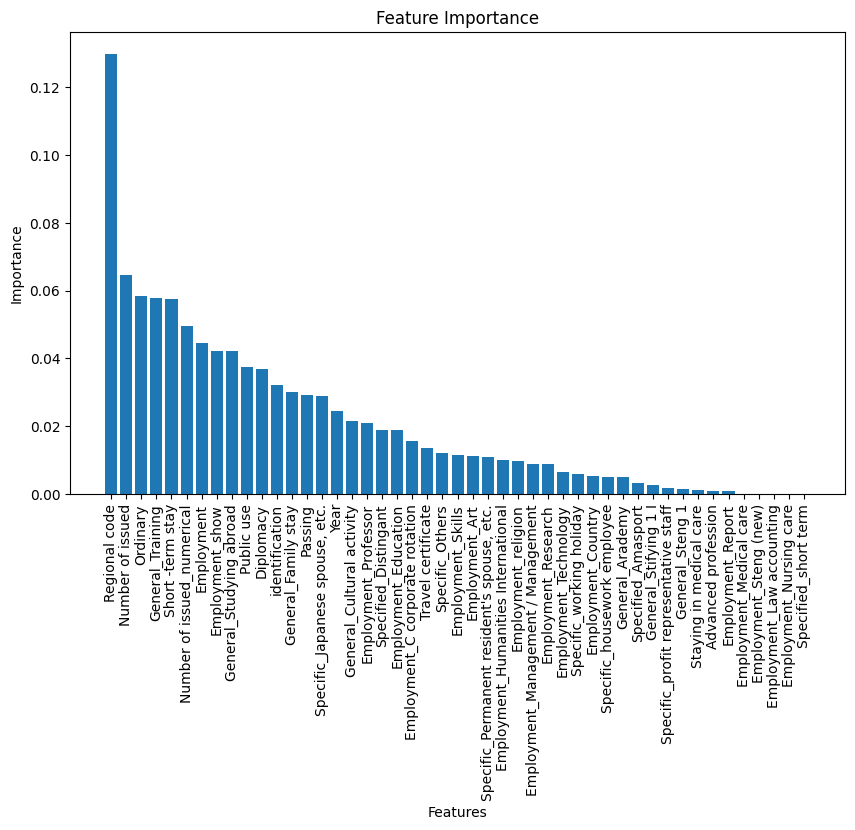

In [7]:
# Plot feature importances of the Random Forest classifier
import matplotlib.pyplot as plt

# Get feature importances
importances = model.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

## 2b: Where are they going?

### Dataset 3: Spatial distribution of foreign residents within Japan

In [13]:
# Load administrative boundary data for Japan's prefectures
import geopandas as gpd

japan = gpd.read_file("datasets/2_immigration/prefectures.geojson")
prefectures_english = [
    "Hokkaido", "Aomori", "Iwate", "Miyagi", "Akita", "Yamagata", "Fukushima", "Ibaraki", "Tochigi", 
    "Gunma", "Saitama", "Chiba", "Tokyo", "Kanagawa", "Niigata", "Toyama", "Ishikawa", "Fukui", 
    "Yamanashi", "Nagano", "Gifu", "Shizuoka", "Aichi", "Mie", "Shiga", "Kyoto", "Osaka", "Hyogo", 
    "Nara", "Wakayama", "Tottori", "Shimane", "Okayama", "Hiroshima", "Yamaguchi", "Tokushima", 
    "Kagawa", "Ehime", "Kochi", "Fukuoka", "Saga", "Nagasaki", "Kumamoto", "Oita", "Miyazaki", 
    "Kagoshima", "Okinawa"
]
japan['P'] = prefectures_english
japan.rename(columns={'P': 'Prefecture'}, inplace=True)
japan.head()

,Prefecture,geometry
0,Hokkaido,"MULTIPOLYGON (((144.08144 44.12506, 144.08146 ..."
1,Aomori,"MULTIPOLYGON (((140.73524 40.83351, 140.73518 ..."
2,Iwate,"MULTIPOLYGON (((142.01379 39.50042, 142.01364 ..."
3,Miyagi,"MULTIPOLYGON (((140.56324 38.37720, 140.56338 ..."
4,Akita,"MULTIPOLYGON (((140.05370 39.73879, 140.05356 ..."


In [14]:
# Load foreign resident data
import pandas as pd

foreigners = pd.read_csv("datasets/2_immigration/foreign_residents.csv")
foreigners = foreigners.drop(0) # Drop first row
foreigners.head()

,Prefecture,Total,China,Vietnam,South Korea,Philippines,Brazil,Nepal,Indonesia,Myanmar,USA,Taiwan,Other
1,Aomori,"7,164",988,"2,253",685,839,33,165,513,219,396,73,"1,000"
2,Iwate,"9,112","1,517","2,429",683,"1,466",107,249,710,420,216,96,"1,219"
3,Miyagi,"25,220","5,396","4,448","2,963","1,589",164,"2,564","1,565",993,697,428,"4,413"
4,Akita,"4,940",947,869,489,899,12,135,289,83,216,46,955
5,Yamagata,"8,756","1,850","2,463","1,404",944,99,195,305,201,195,133,967


In [15]:
# Merge two dataframes
japan_foreigners = japan.merge(foreigners, on='Prefecture') # Add foreign resident data to prefecture geodataframe
japan_foreigners[japan_foreigners.columns[2:]] = japan_foreigners[japan_foreigners.columns[2:]].replace(',','', regex=True) # Strip commas from numbers 
japan_foreigners[japan_foreigners.columns[2:]] = japan_foreigners[japan_foreigners.columns[2:]].apply(pd.to_numeric)
japan_foreigners.head()

,Prefecture,geometry,Total,China,Vietnam,South Korea,Philippines,Brazil,Nepal,Indonesia,Myanmar,USA,Taiwan,Other
0,Hokkaido,"MULTIPOLYGON (((144.08144 44.12506, 144.08146 ...",49152,9358,11417,4217,2706,168,1929,4289,2030,1418,1271,10349
1,Aomori,"MULTIPOLYGON (((140.73524 40.83351, 140.73518 ...",7164,988,2253,685,839,33,165,513,219,396,73,1000
2,Iwate,"MULTIPOLYGON (((142.01379 39.50042, 142.01364 ...",9112,1517,2429,683,1466,107,249,710,420,216,96,1219
3,Miyagi,"MULTIPOLYGON (((140.56324 38.37720, 140.56338 ...",25220,5396,4448,2963,1589,164,2564,1565,993,697,428,4413
4,Akita,"MULTIPOLYGON (((140.05370 39.73879, 140.05356 ...",4940,947,869,489,899,12,135,289,83,216,46,955


In [ ]:
# Plot map of Japan prefectures colored by number of foreign residents
import plotly.express as px

fig = px.choropleth_mapbox(japan_foreigners, 
                           geojson=japan_foreigners.geometry, 
                           locations=japan_foreigners.index, 
                           color="Total", 
                           hover_name="Prefecture", 
                           hover_data="Total", 
                           mapbox_style="carto-positron", 
                           zoom=3, 
                           center = {"lat": 37.0902, "lon": 138.7129}, 
                           opacity=0.5, 
                           labels={'Total':'Number of Foreign Residents'})
fig.update_layout(title_text='Number of Foreign Residents in Japan by Prefecture (2023)')
fig.show(); # Suppress output to keep size small

# Conclusion: Recommendations

